In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import re

In [2]:
collectedData = {}
df_grad_cd_list = []
for dir1 in os.listdir("CollectedData"):
    if os.path.isdir(os.path.join("CollectedData", dir1)):
        
        collectedData[dir1] = {}
        for dsn_dir in os.listdir(os.path.join("CollectedData", dir1)):
            if os.path.isdir(os.path.join("CollectedData", dir1, dsn_dir)):
                data = json.load(open(os.path.join("CollectedData", dir1, dsn_dir, "dsn_data.json"), "r"))
                collectedData[dir1][dsn_dir] = data

In [3]:
re_log_line = r"\|\s+\d+(\|\s+-?\d+\.\d+){4}\|\n"

dir_list = []
dfs = []
dv_mat = []
surf_dfs = []
surf_cd_dfs = []

#df_meta = pd.DataFrame(columns=["AOA"])
meta_rows = []

result_rows = []
for dir1 in sorted(collectedData.keys()):
    if dir1.startswith("T003"): # or dir1.startswith("T005"):
        for dsn_dir in sorted(collectedData[dir1].keys()):
            dir_str = f"{dir1} {dsn_dir}"
            print(dir_str)
            field_names = ["config_DSN.cfg", "grad_cd", "surface_adjoint_drag", "surface_flow", "log_direct"]
            if len(collectedData[dir1][dsn_dir].keys() & set(field_names)) < len(field_names):
                print("skipping", dir_str)
                continue
            if "config_DSN.cfg" in collectedData[dir1][dsn_dir]:
                config_lines = collectedData[dir1][dsn_dir]["config_DSN.cfg"]
                dv_line = [l for l in config_lines if l.startswith("DV_VALUE=")][-1].strip()
                #print(dv_line)
                dvs = [float(x) for x in dv_line[10:].split(", ")]
                #if len(dvs) < 30:
                #    print(dir1, dsn_dir)
                #    continue
                #print(dvs)
                if len(dvs) == 38:
                    dv_mat.append(dvs)
            if "grad_cd" in collectedData[dir1][dsn_dir]:
                df = pd.DataFrame.from_dict(collectedData[dir1][dsn_dir]["grad_cd"])
                df["DIR"] = dir_str
                dfs.append(df)
                dir_list.append(f"{dir1} {dsn_dir}")
            if "surface_adjoint_drag" in collectedData[dir1][dsn_dir]:
                surf_df = pd.DataFrame.from_dict(collectedData[dir1][dsn_dir]["surface_adjoint_drag"])
                surf_df["DIR"] = dir_str
                surf_cd_dfs.append(surf_df)
            if "surface_flow" in collectedData[dir1][dsn_dir]:
                surf_df = pd.DataFrame.from_dict(collectedData[dir1][dsn_dir]["surface_flow"])
                surf_df["DIR"] = dir_str
                surf_dfs.append(surf_df)
            if "log_direct" in collectedData[dir1][dsn_dir]:
                log_lines = collectedData[dir1][dsn_dir]["log_direct"]
                log_lines_iter = [l for l in log_lines if re.match(re_log_line, l)]#[-100:]
                lls = log_lines_iter[-1].split("|")[1:-1]
                iteration = int(lls[0])
                rms_rho = float(lls[1])
                rms_nu = float(lls[2])
                c_L = float(lls[3])
                c_D = float(lls[4])
                #print(dir_str, c_L, c_D)
                result_rows.append((dir_str, c_L, c_D, rms_rho, rms_nu))
            if "flow.meta" in collectedData[dir1][dsn_dir]:
                #print(collectedData[dir1][dsn_dir]["flow.meta"])
                #break
                for l in collectedData[dir1][dsn_dir]["flow.meta"]:
                    if l.startswith("AOA="):
                        meta_rows.append((dir_str, float(l.strip().split()[1])))

#dv_mat = np.asarray(dv_mat)
df_result = pd.DataFrame(columns=["DIR", "c_L", "c_D", "rms_rho", "rms_nu"], data=result_rows)
df_meta =  pd.DataFrame(columns=["DIR", "AOA"], data=meta_rows)
df_result = df_result.merge(df_meta, on="DIR")

T003_turb DSN_002
T003_turb DSN_003
T003_turb DSN_004
T003_turb DSN_005
T003_turb DSN_006
T003_turb DSN_007
T003_turb DSN_008
T003_turb DSN_009
T003_turb DSN_010
T003_turb DSN_011
T003_turb DSN_012
T003_turb DSN_013
T003_turb DSN_014
T003_turb DSN_015
T003_turb DSN_016
T003_turb DSN_017
T003_turb DSN_018
T003_turb DSN_019
T003_turb DSN_020
T003_turb DSN_021
T003_turb DSN_022
T003_turb DSN_023
T003_turb DSN_024
T003_turb DSN_025
T003_turb DSN_026
T003_turb DSN_027
T003_turb DSN_028
T003_turb DSN_029
T003_turb DSN_030
T003_turb DSN_031
T003_turb DSN_032
T003_turb DSN_033
T003_turb DSN_034
T003_turb DSN_035
T003_turb DSN_036
T003_turb DSN_037
T003_turb DSN_038
T003_turb DSN_039
T003_turb DSN_040
T003_turb DSN_041
T003_turb DSN_042
T003_turb DSN_043
T003_turb DSN_044
T003_turb DSN_045
T003_turb DSN_046
T003_turb DSN_047
T003_turb DSN_048
T003_turb DSN_049
T003_turb DSN_050
T003_turb DSN_051
T003_turb DSN_052
T003_turb DSN_053
T003_turb DSN_054
T003_turb DSN_055
T003_turb DSN_056
T003_turb 

In [4]:
import pickle
dir1 = "T005_turb"
dv_list = pickle.load(open(os.path.join("CollectedData", dir1, "dv_list.p"), "rb"))
dv_mat2 = np.asarray(dv_list) #[:len(dir_list),:]
if len(dv_mat):
    dv_mat = np.vstack((np.asarray(dv_mat), dv_mat2))[:len(dir_list),:]
else:
    dv_mat = dv_mat2[:len(dir_list),:]

In [5]:
np.asarray(dv_mat).shape, dv_mat2.shape

((381, 38), (1000, 38))

In [6]:
df_result

,DIR,c_L,c_D,rms_rho,rms_nu,AOA
0,T003_turb DSN_002,0.724186,0.011605,-6.451430,-8.755026,2.285286
1,T003_turb DSN_003,0.724200,0.011163,-6.454355,-8.759274,2.409032
2,T003_turb DSN_004,0.724185,0.012970,-6.456526,-8.723936,2.223996
3,T003_turb DSN_005,0.724183,0.012497,-6.435272,-8.678649,2.367014
4,T003_turb DSN_006,0.724191,0.012171,-6.454220,-8.800678,2.390727
...,...,...,...,...,...,...
376,T003_turb DSN_378,0.724169,0.013263,-6.448357,-8.646667,2.416904
377,T003_turb DSN_379,0.724188,0.012968,-6.450032,-8.760846,2.261456
378,T003_turb DSN_380,0.724162,0.016124,-6.449873,-8.626946,2.497748
379,T003_turb DSN_381,0.724169,0.014061,-6.443158,-8.790737,2.203566


In [7]:
df_cd_grad = pd.concat(dfs) #.set_index("DIR") #.sort_values("DIR")

In [8]:
df_cd_grad

,VAR,CD_GRAD,STEP,DIR
0,0,0.932305,0.001,T003_turb DSN_002
1,1,0.902509,0.001,T003_turb DSN_002
2,2,0.756924,0.001,T003_turb DSN_002
3,3,0.575045,0.001,T003_turb DSN_002
4,4,0.394999,0.001,T003_turb DSN_002
...,...,...,...,...
33,33,-0.522271,0.001,T003_turb DSN_382
34,34,-0.384100,0.001,T003_turb DSN_382
35,35,-0.214672,0.001,T003_turb DSN_382
36,36,0.079292,0.001,T003_turb DSN_382


In [9]:
d_CD = np.resize(df_cd_grad["CD_GRAD"].values, ((len(dir_list), 38)))

In [10]:
#d_CD[2] == df_cd_grad[df_cd_grad["DIR"]=="T003_turb DSN_004"]["CD_GRAD"].values

In [11]:
d_CD.shape

(381, 38)

In [12]:
C = np.dot(d_CD.T, d_CD) / d_CD.shape[0]

In [13]:
np.dot(d_CD.T, d_CD) / d_CD.shape[0]

array([[ 0.94340596,  0.92199914,  0.78244046, ..., -0.13459403,
         0.0632007 ,  0.35466213],
       [ 0.92199914,  0.90109992,  0.76472987, ..., -0.13158833,
         0.06180316,  0.34683609],
       [ 0.78244046,  0.76472987,  0.64903004, ..., -0.11174788,
         0.05249738,  0.29465241],
       ...,
       [-0.13459403, -0.13158833, -0.11174788, ...,  0.02085843,
        -0.00915793, -0.05388723],
       [ 0.0632007 ,  0.06180316,  0.05249738, ..., -0.00915793,
         0.00449763,  0.02508269],
       [ 0.35466213,  0.34683609,  0.29465241, ..., -0.05388723,
         0.02508269,  0.14605513]])

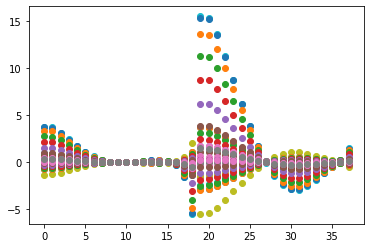

In [14]:
for i in range(38):
    plt.plot(C[i], 'o')

In [15]:
C.shape

(38, 38)

In [16]:
C

array([[ 0.94340596,  0.92199914,  0.78244046, ..., -0.13459403,
         0.0632007 ,  0.35466213],
       [ 0.92199914,  0.90109992,  0.76472987, ..., -0.13158833,
         0.06180316,  0.34683609],
       [ 0.78244046,  0.76472987,  0.64903004, ..., -0.11174788,
         0.05249738,  0.29465241],
       ...,
       [-0.13459403, -0.13158833, -0.11174788, ...,  0.02085843,
        -0.00915793, -0.05388723],
       [ 0.0632007 ,  0.06180316,  0.05249738, ..., -0.00915793,
         0.00449763,  0.02508269],
       [ 0.35466213,  0.34683609,  0.29465241, ..., -0.05388723,
         0.02508269,  0.14605513]])

In [17]:
import scipy

In [18]:
from scipy import linalg

In [19]:
l, W = scipy.linalg.eig(C)

In [20]:
np.outer(d_CD[0], d_CD[0]).shape

C2 = np.zeros_like(C)
for i in range(d_CD.shape[0]):
    C2 += np.outer(d_CD[i], d_CD[i].T)

C2 = C2 / d_CD.shape[0]

In [21]:
d_CD[0]

array([ 9.32305e-01,  9.02509e-01,  7.56924e-01,  5.75045e-01,
        3.94999e-01,  2.38223e-01,  1.15757e-01,  3.09355e-02,
       -1.86796e-02, -3.93433e-02, -3.91279e-02, -2.61724e-02,
       -7.66966e-03,  9.85289e-03,  1.82074e-02,  1.28256e-03,
       -8.18707e-02, -3.49449e-01, -1.17100e+00,  3.75622e+00,
        3.49613e+00,  2.88665e+00,  2.17368e+00,  1.46664e+00,
        8.27131e-01,  2.90078e-01, -1.27991e-01, -4.23715e-01,
       -6.02687e-01, -6.76632e-01, -6.62975e-01, -5.86550e-01,
       -4.79741e-01, -3.73426e-01, -2.74779e-01, -1.48658e-01,
        6.07028e-02,  3.38619e-01])

In [22]:
i = 0
np.outer(d_CD[i], d_CD[i].T)#.shape

array([[ 0.86919261,  0.84141365,  0.70568403, ..., -0.1385946 ,
         0.05659352,  0.31569619],
       [ 0.84141365,  0.8145225 ,  0.68313072, ..., -0.13416518,
         0.05478482,  0.3056067 ],
       [ 0.70568403,  0.68313072,  0.57293394, ..., -0.11252281,
         0.04594741,  0.25630885],
       ...,
       [-0.1385946 , -0.13416518, -0.11252281, ...,  0.0220992 ,
        -0.00902396, -0.05033842],
       [ 0.05659352,  0.05478482,  0.04594741, ..., -0.00902396,
         0.00368483,  0.02055512],
       [ 0.31569619,  0.3056067 ,  0.25630885, ..., -0.05033842,
         0.02055512,  0.11466283]])

In [23]:
C[:3,:3], C2[:3,:3]

(array([[0.94340596, 0.92199914, 0.78244046],
        [0.92199914, 0.90109992, 0.76472987],
        [0.78244046, 0.76472987, 0.64903004]]),
 array([[0.94340596, 0.92199914, 0.78244046],
        [0.92199914, 0.90109992, 0.76472987],
        [0.78244046, 0.76472987, 0.64903004]]))

In [24]:
i = 0
C2[0,0], d_CD[:,0]*d_CD[:,0].T / d_CD.shape[0], np.multiply(d_CD[i].T, d_CD[i])

(0.9434059612518765,
 array([0.00228135, 0.00200547, 0.0025872 , 0.00226736, 0.00226774,
        0.0023771 , 0.00262444, 0.00215269, 0.00254902, 0.00242838,
        0.00253413, 0.00251691, 0.00275029, 0.00267817, 0.00264856,
        0.00252987, 0.00257859, 0.0025538 , 0.002486  , 0.00238094,
        0.00238153, 0.00237115, 0.00234164, 0.00251697, 0.00230126,
        0.00203915, 0.00231104, 0.00250331, 0.00266218, 0.0023986 ,
        0.00284425, 0.00247303, 0.00247851, 0.00242432, 0.00267049,
        0.00255316, 0.00276288, 0.00239366, 0.00259622, 0.00238529,
        0.00224343, 0.00248637, 0.00266461, 0.00261671, 0.00231277,
        0.00233241, 0.00266599, 0.00274513, 0.00247909, 0.00248007,
        0.00276438, 0.00233054, 0.00238915, 0.00256076, 0.00210109,
        0.00226584, 0.00262264, 0.00273199, 0.00252863, 0.0026493 ,
        0.00213843, 0.00243656, 0.00238453, 0.00279122, 0.00255037,
        0.00265267, 0.00252265, 0.00245446, 0.00249219, 0.00235156,
        0.00248133, 0.00224

In [25]:
l

array([6.75565946e+01+0.j, 5.35083183e-01+0.j, 7.38663389e-02+0.j,
       4.48149773e-02+0.j, 7.09691478e-03+0.j, 4.02772040e-03+0.j,
       1.46688559e-03+0.j, 1.07016246e-03+0.j, 3.69589719e-04+0.j,
       1.15605727e-04+0.j, 6.03121339e-05+0.j, 2.45008298e-05+0.j,
       1.70721863e-05+0.j, 1.02117162e-05+0.j, 5.55325421e-06+0.j,
       2.68991685e-06+0.j, 1.89245268e-06+0.j, 4.26975577e-07+0.j,
       2.13484457e-07+0.j, 4.98533088e-08+0.j, 2.39350894e-08+0.j,
       5.54902044e-09+0.j, 1.09675722e-09+0.j, 2.17393260e-10+0.j,
       7.67912958e-11+0.j, 2.95338782e-11+0.j, 7.34234983e-12+0.j,
       5.61698004e-12+0.j, 1.73214419e-12+0.j, 6.15558419e-13+0.j,
       2.91569340e-13+0.j, 1.11325146e-13+0.j, 1.01225469e-13+0.j,
       7.58412611e-14+0.j, 4.76527221e-14+0.j, 7.81346992e-15+0.j,
       2.05585267e-15+0.j, 1.57950608e-15+0.j])

In [26]:
import matplotlib.pyplot as plt

C:\Users\Nils\Anaconda3\envs\MA\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Eigenmodes')

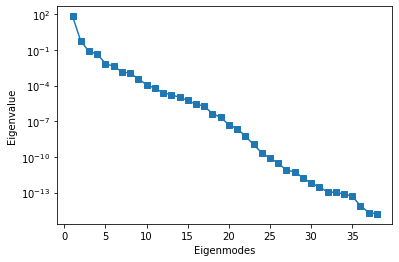

In [27]:
plt.semilogy(range(1,39), l, "-s")
plt.gca().set_ylabel("Eigenvalue")
plt.gca().set_xlabel("Eigenmodes")

C:\Users\Nils\Anaconda3\envs\MA\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Cum. Fraction of Total EV')

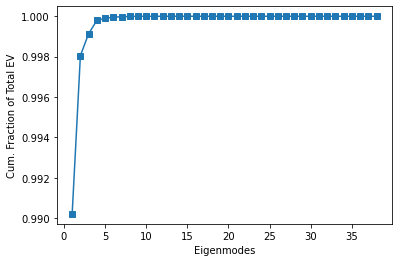

In [28]:
plt.plot(range(1,39), l.cumsum() / l.sum(), "-s")
plt.gca().set_xlabel("Eigenmodes")
plt.gca().set_ylabel("Cum. Fraction of Total EV")

In [384]:
l, l.cumsum() / l.sum()

(array([6.75565946e+01+0.j, 5.35083183e-01+0.j, 7.38663389e-02+0.j,
        4.48149773e-02+0.j, 7.09691478e-03+0.j, 4.02772040e-03+0.j,
        1.46688559e-03+0.j, 1.07016246e-03+0.j, 3.69589719e-04+0.j,
        1.15605727e-04+0.j, 6.03121339e-05+0.j, 2.45008298e-05+0.j,
        1.70721863e-05+0.j, 1.02117162e-05+0.j, 5.55325421e-06+0.j,
        2.68991685e-06+0.j, 1.89245268e-06+0.j, 4.26975577e-07+0.j,
        2.13484457e-07+0.j, 4.98533088e-08+0.j, 2.39350894e-08+0.j,
        5.54902044e-09+0.j, 1.09675722e-09+0.j, 2.17393260e-10+0.j,
        7.67912958e-11+0.j, 2.95338782e-11+0.j, 7.34234983e-12+0.j,
        5.61698004e-12+0.j, 1.73214419e-12+0.j, 6.15558419e-13+0.j,
        2.91569340e-13+0.j, 1.11325146e-13+0.j, 1.01225469e-13+0.j,
        7.58412611e-14+0.j, 4.76527221e-14+0.j, 7.81346992e-15+0.j,
        2.05585267e-15+0.j, 1.57950608e-15+0.j]),
 array([0.99020831+0.j, 0.99805127+0.j, 0.99913397+0.j, 0.99979084+0.j,
        0.99989486+0.j, 0.9999539 +0.j, 0.9999754 +0.j, 0.9999

In [382]:
for x in l.cumsum() / float(l.sum()):
    print("{:.4f}".format(float(x)))

0.9902
0.9981
0.9991
0.9998
0.9999
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000
1.0000


<ipython-input-382-368f35145ae8>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  for x in l.cumsum() / float(l.sum()):
<ipython-input-382-368f35145ae8>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  print("{:.4f}".format(float(x)))


In [386]:
r = 5

In [387]:
#U = np.zeros_like(W)
U = W[:r,:].copy()
l1 = l[:r]

#V = np.zeros_like(W)
V = W[r:,:].copy()
l2 = l[r:]

In [388]:
#U = np.zeros_like(W)
U2 = W[:,:r].copy()
l1 = l[:r]

#V = np.zeros_like(W)
V2 = W[:,r:].copy()
l2 = l[r:]

In [389]:
U - U2.T

array([[ 0.00000000e+00,  3.52289699e-02, -1.32985635e-01,
        -2.72566895e-01, -8.39377105e-02, -1.14538701e-01,
         2.52574633e-01, -8.70088079e-02,  6.59355560e-02,
         4.05264402e-04,  2.35437485e-01, -3.11037500e-01,
         2.90032214e-01, -3.14155035e-01, -3.63445110e-01,
        -1.89264311e-02, -2.43289058e-01, -2.28824862e-01,
         7.18088357e-02,  6.01153189e-01,  4.82672382e-01,
         2.60986724e-01,  3.52257999e-01,  4.21773922e-01,
         2.01141889e-01,  2.58792824e-02,  5.04534722e-02,
         1.47774641e-03, -4.15689731e-02, -2.03909468e-02,
        -8.82741485e-02, -1.11235979e-01, -7.31192387e-02,
        -5.81091426e-02, -2.66142185e-02, -1.96175529e-02,
         8.55199105e-03,  4.48422825e-02],
       [-3.52289699e-02,  0.00000000e+00, -1.49932415e-01,
        -2.94610188e-01, -1.02359448e-01, -1.24155118e-01,
         2.06450776e-01, -1.16505398e-01,  7.01071260e-02,
        -3.87343548e-02,  9.60731925e-02, -1.16130150e-01,
         5.76

In [390]:
x = np.zeros(38)
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [391]:
y = np.dot(U, x)
y, y.shape

(array([0., 0., 0., 0., 0.]), (5,))

In [392]:
U.shape, V.shape, dv_mat.shape, np.sum(l)

((5, 38), (33, 38), (381, 38), (68.22462894917724+0j))

In [393]:
Y = np.dot(dv_mat, U2) #* np.sum(l).astype("double")
Y.shape, df_result["c_D"].shape

((381, 5), (381,))

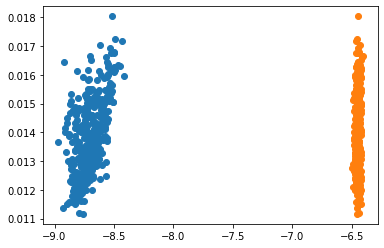

In [394]:
plt.plot(df_result["rms_nu"], df_result["c_D"], "o")
plt.plot(df_result["rms_rho"], df_result["c_D"], "o")

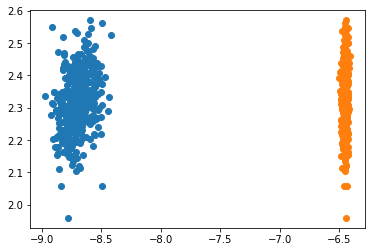

In [395]:
plt.plot(df_result["rms_nu"], df_result["AOA"], "o")
plt.plot(df_result["rms_rho"], df_result["AOA"], "o")

In [396]:
a = df_result["rms_rho"] < -6

In [397]:
Y[a].shape

(381, 5)

C:\Users\Nils\Anaconda3\envs\MA\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


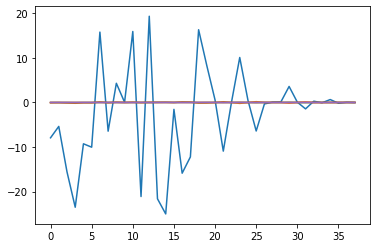

In [398]:
#fig, axes = plt.subplots(1, 1, figsize=(16,40))

plt.plot(U[:r].T * l[:r])

In [399]:
np.dot(dv_mat[0], U.T)

array([ 7.70160482e-06,  4.14127147e-06,  1.69501522e-07,  4.73673571e-06,
       -7.92285388e-06])

In [400]:
np.dot(dv_mat[0], U[0]), Y[0,0]

(7.701604823971359e-06, 5.884943789679209e-06)

In [401]:
c_D = df_result["c_D"].values

In [402]:
c_D

array([0.011605, 0.011163, 0.01297 , 0.012497, 0.012171, 0.013483,
       0.013398, 0.011187, 0.014597, 0.013292, 0.015821, 0.012012,
       0.015211, 0.015144, 0.014759, 0.014414, 0.013169, 0.014733,
       0.013084, 0.013204, 0.012854, 0.013758, 0.012906, 0.014814,
       0.01226 , 0.01257 , 0.013522, 0.013278, 0.013418, 0.013091,
       0.015245, 0.013158, 0.013844, 0.014127, 0.014943, 0.014222,
       0.016025, 0.012907, 0.014612, 0.013244, 0.012788, 0.013447,
       0.013178, 0.01389 , 0.013864, 0.012806, 0.015713, 0.015477,
       0.013691, 0.014239, 0.016649, 0.012795, 0.013323, 0.013553,
       0.012898, 0.01325 , 0.013491, 0.015912, 0.014468, 0.014782,
       0.013342, 0.01306 , 0.013984, 0.013916, 0.012621, 0.016156,
       0.013227, 0.013739, 0.012296, 0.012539, 0.015094, 0.012114,
       0.013787, 0.013271, 0.016361, 0.013673, 0.013397, 0.014163,
       0.014892, 0.014254, 0.013398, 0.011986, 0.012265, 0.011958,
       0.011514, 0.011513, 0.012073, 0.012941, 0.01467 , 0.013

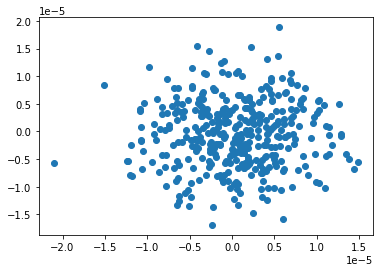

In [403]:
plt.scatter(Y[:,0], Y[:,1]) #, c=df_result["c_D"])
#plt.scatter(Y[:,0], df_result["c_D"]), plt.scatter(Y[:,1], df_result["c_D"]), plt.scatter(Y[:,2], df_result["c_D"])
#plt.scatter(Y[:,:], df_result["c_D"])

In [404]:
from sklearn.manifold import LocallyLinearEmbedding

In [405]:
embedding = LocallyLinearEmbedding(n_components=2)
X_transformed = embedding.fit_transform(dv_mat)
#Y = X_transformed

X_transformed.shape

(381, 2)

In [406]:
from sklearn.model_selection import train_test_split

In [407]:
x_train, x_test, y_train, y_test = train_test_split(Y[a], df_result["c_D"][a], test_size=0.2, random_state=21)
#x_train, x_test, y_train, y_test = train_test_split(Y[a], df_meta["AOA"][a], test_size=0.2, random_state=21)
#df_meta

In [408]:
x_train.shape, y_test.shape

((304, 5), (77,))

In [409]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel, WhiteKernel)


In [410]:
#kernel = 1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-2, 10.0), nu=1.5)

In [411]:
kernel = RBF() + Matern(nu=1.5) #+ WhiteKernel() #+ RBF()

In [412]:
#kernel = ConstantKernel(0.1, (0.01, 10.0)) * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2) + Matern(length_scale=1.0, length_scale_bounds=(1e-2, 10.0), nu=1.5) #+ WhiteKernel(noise_level=0.1)

In [413]:
kernel = ConstantKernel()*Matern(nu=2.5) + ConstantKernel()*Matern(nu=1.5) + WhiteKernel() # + DotProduct()

In [414]:
kernel = 1.0 * RBF(length_scale=0.1e-05, length_scale_bounds=(1e-7, 10.0)) + WhiteKernel(noise_level=0.05, noise_level_bounds=(1e-07, 1e-02))# + ConstantKernel()

In [415]:
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=3, normalize_y=False)
gp.fit(x_train, y_train)
print(gp.kernel_)
print(gp.score(x_train, y_train))
print(gp.score(x_test, y_test))
print(gp.log_marginal_likelihood())

0.0174**2 * RBF(length_scale=7.63e-05) + WhiteKernel(noise_level=1.1e-07)
0.941952925689732
0.9437235339292275
1950.4897870587145


In [416]:
r

5

Text(0.5, 1.0, 'Validation Data')

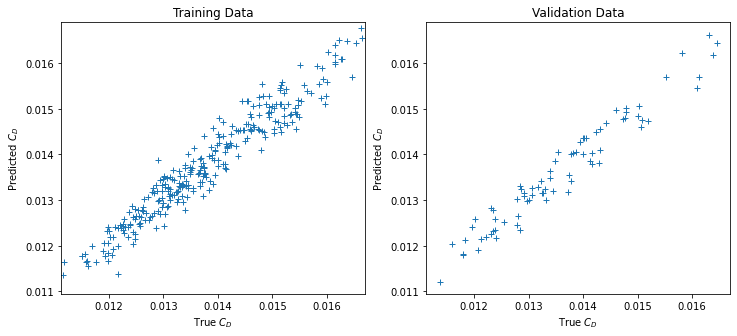

In [417]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)

y_pred = gp.predict(x_train)
y_train.values
#plt.plot(y_pred)
plt.plot(y_train.values, y_pred, '+')

#plt.gca().set_xlim([0.008, 0.042])
#plt.gca().set_ylim([0.008, 0.042])
ax1 = plt.gca()
ax1.set_ylabel("Predicted $C_D$")
ax1.set_xlabel("True $C_D$")
ax1.set_title("Training Data")

plt.subplot(1, 2, 2)

y_pred = gp.predict(x_test)
y_test.values
#plt.plot(y_pred)
plt.plot(y_test.values, y_pred, '+', label="asd")
#plt.plot(y_pred, 'o', c="r")
ax1.set_xlim(plt.gca().get_xlim())
ax1.set_ylim(plt.gca().get_ylim())
ax2 = plt.gca()
ax2.set_ylabel("Predicted $C_D$")
ax2.set_xlabel("True $C_D$")
ax2.set_title("Validation Data")

In [418]:
#plt.plot(Y[:,4][a], df_result["c_D"][a], "o")

In [419]:
np.sum(df_result["rms_rho"] < -6)

381

In [420]:
y_lb = np.min(Y[a])
y_ub = np.max(Y[a])
y_lb, y_ub

(-2.1032296051045117e-05, 1.8874483680758046e-05)

In [421]:
X_ = np.linspace(y_lb, y_ub, 100)
#y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)

In [422]:
#np.dot(U[0, :, np.newaxis], X_[np.newaxis, :])
X_ = np.zeros((r, 100))
X_[0] = np.linspace(y_lb, y_ub, 100)

In [423]:
y_mean, y_std = gp.predict(X_.T, return_std=True)

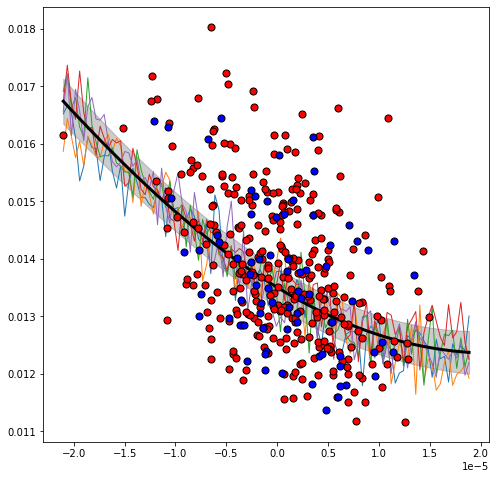

In [424]:
plt.figure(figsize=(8, 8))
plt.plot(X_[0], y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_[0], y_mean - y_std, y_mean + y_std, alpha=0.2, color='k')
y_samples = gp.sample_y(X_.T, 5)
plt.plot(X_[0], y_samples, lw=1)
plt.scatter(x_train[:, 0], y_train, c='r', s=50, zorder=10, edgecolors=(0, 0, 0), )
plt.scatter(x_test[:, 0], y_test, c='b', s=50, zorder=10, edgecolors=(0, 0, 0))

In [425]:
np.dot(X_, np.ones((20,1)))

ValueError: shapes (5,100) and (20,1) not aligned: 100 (dim 1) != 20 (dim 0)

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel, WhiteKernel)


kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)),
           1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1),
           1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0,
                                length_scale_bounds=(0.1, 10.0),
                                periodicity_bounds=(1.0, 10.0)),
           ConstantKernel(0.1, (0.01, 10.0))
               * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2)  + WhiteKernel(),
           1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
                        nu=1.5)]

for kernel in kernels:
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Plot prior
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')
    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)

    # Generate data and fit GP
    rng = np.random.RandomState(4)
    X = rng.uniform(0, 5, 10)[:, np.newaxis]
    y = np.sin((X[:, 0] - 2.5) ** 2)
    gp.fit(X, y)

    # Plot posterior
    plt.subplot(2, 1, 2)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')

    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize=12)
    plt.tight_layout()

plt.show()

In [ ]:
df_result["c_D"].argmin()

#### 

In [ ]:
df_result.loc[706]